# ICEGRAV 2012-2013 Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pyproj
import pygmt

In [2]:
icegrav = pd.read_table(
    '../data/ICEGRAV_Mag_2013_v2.XYZ',
    delim_whitespace=True,
    na_values="*",
    dtype={'Line_Number':str}
)
icegrav.dropna(subset=('Lon', 'Lat'), inplace=True)
icegrav

,Flight_ID,Line_Number,Lon,Lat,x,y,Height_WGS1984,Date,Time,MagR,...,MagRTC,BCorr_FD83,BCorr_Halley,BCorr_Applied,MagBRTC,ACorr,SCorr,MagF,MagL,MagML
0,15.00,100,17.666285,-83.314112,7.778616e+05,7.549582e+05,2689.4,2013/01/26,08:42:20.00,50618.44,...,320.24,197.74,-28.68,197.74,122.50,NaN,NaN,NaN,69.84,54.09
1,15.00,100,17.661398,-83.314174,7.778627e+05,7.550222e+05,2689.5,2013/01/26,08:42:21.00,50617.95,...,320.08,197.71,-28.68,197.71,122.37,52.63,NaN,69.74,69.73,54.03
2,15.00,100,17.656513,-83.314235,7.778639e+05,7.550861e+05,2689.6,2013/01/26,08:42:22.00,50617.64,...,320.00,197.68,-28.69,197.68,122.32,52.64,NaN,69.69,69.60,53.96
3,15.00,100,17.651631,-83.314296,7.778651e+05,7.551500e+05,2689.8,2013/01/26,08:42:23.00,50617.10,...,319.72,197.64,-28.69,197.64,122.08,52.65,NaN,69.43,69.48,53.87
4,15.00,100,17.646752,-83.314355,7.778664e+05,7.552139e+05,2689.9,2013/01/26,08:42:24.00,50616.83,...,319.60,197.60,-28.70,197.60,122.00,52.66,NaN,69.34,69.34,53.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404564,10.00,10480,-27.993470,-78.733044,1.029192e+06,1.627139e+06,1589.9,2013/01/17,12:11:37.00,45832.18,...,109.35,NaN,-29.12,-29.12,138.46,27.87,NaN,110.59,88.93,NaN
404565,10.00,10480,-27.994831,-78.733557,1.029128e+06,1.627127e+06,1588.7,2013/01/17,12:11:38.00,45832.61,...,109.33,NaN,-29.12,-29.12,138.45,27.94,NaN,110.51,88.93,NaN
404566,10.00,10480,-27.996154,-78.734072,1.029065e+06,1.627115e+06,1587.2,2013/01/17,12:11:39.00,45832.81,...,109.15,NaN,-29.12,-29.12,138.27,28.01,NaN,110.26,88.93,NaN
404567,10.00,10480,-27.997440,-78.734590,1.029002e+06,1.627102e+06,1585.4,2013/01/17,12:11:40.00,45833.40,...,109.24,NaN,-29.13,-29.13,138.37,28.07,NaN,110.29,88.92,NaN


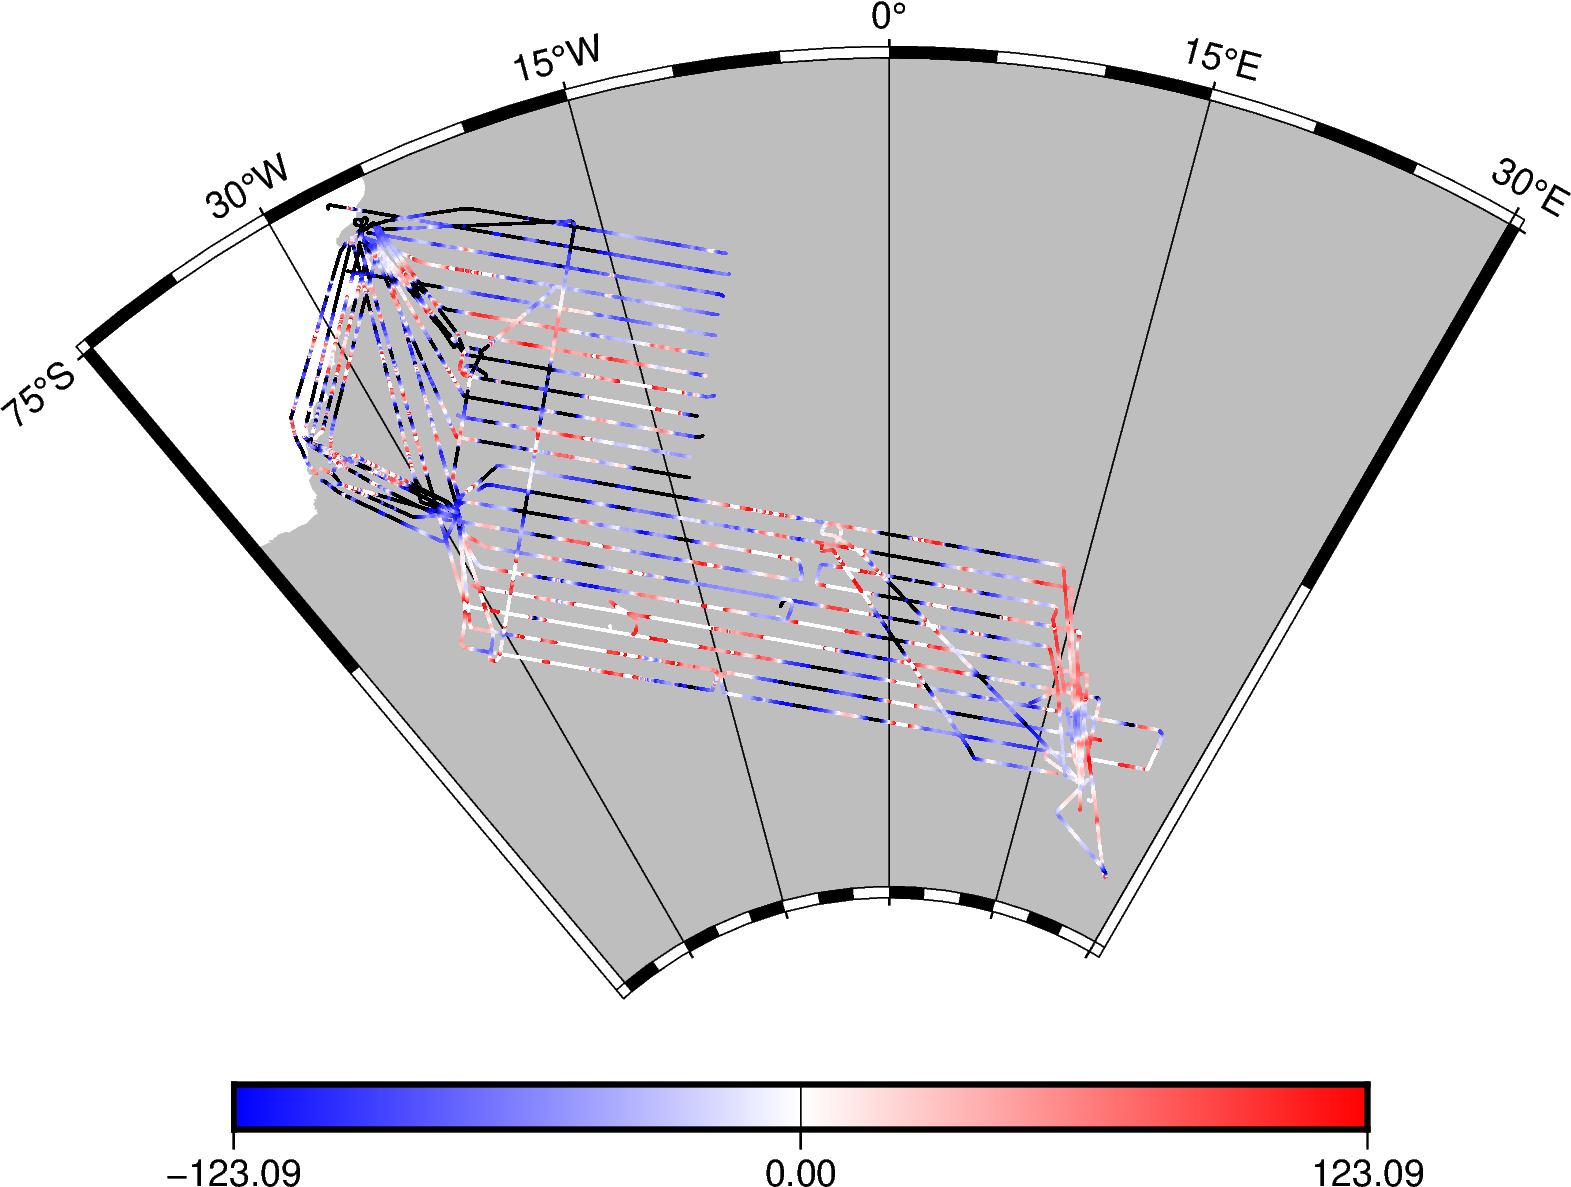

In [27]:
fig = pygmt.Figure()
fig.coast(region=[-40, 30, -85, -75], projection="S0/-90/12c", frame="afg", land="gray")

# Need pygmt.makecpt to plot colour.
# cmap="polar+h" -> +h makes the sure the centre is at zero (white = 0).
scale = np.nanpercentile(icegrav.MagL,90)
# pygmt.makecpt(cmap="polar+h", series=[(icegrav.MagL[~icegrav.MagL.isna()]).min(), (icegrav.MagL[~icegrav.MagL.isna()]).max()])
pygmt.makecpt(cmap="polar+h", series=[-scale, scale])

fig.plot(
    x=icegrav.Lon,
    y=icegrav.Lat,
    fill=(icegrav.MagL),
    style="c0.02c",
    cmap=True,
)
fig.colorbar(position="JBC")
fig.show()

In [7]:
projection = pyproj.Proj(projparams='+proj=ups +south', preserve_units=False)
x,y = projection(icegrav.Lon, icegrav.Lat)

In [8]:
coordinates = [x, y]
coordinates.append(np.full_like(coordinates[0], icegrav.Height_WGS1984))

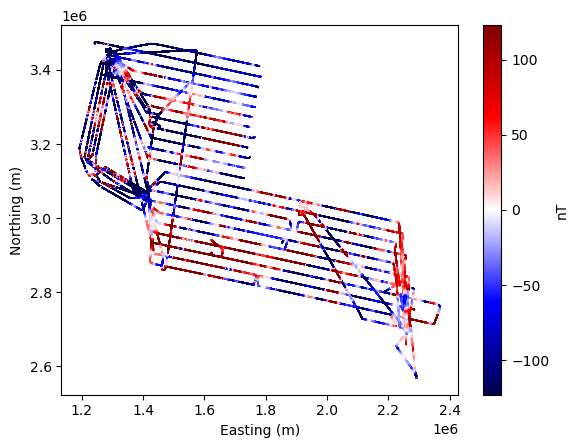

In [9]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 90)
plt.scatter(*coordinates[:2], c=icegrav.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
plt.show()

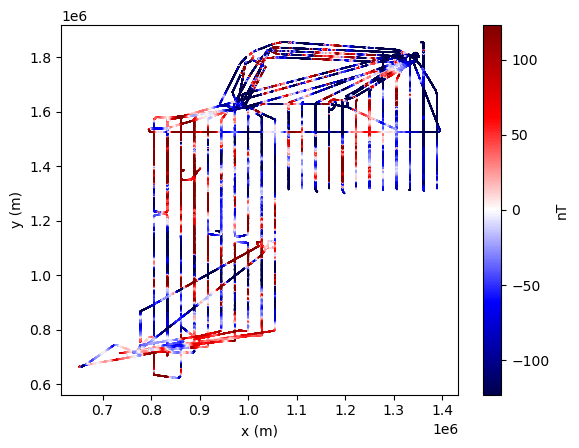

In [11]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 90)
plt.scatter(icegrav.x, icegrav.y, c=icegrav.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.show()

In [23]:
fiss2_bailey = pd.read_csv(
    '../data/FISS2_Bailey_area_ADMAP2.XYZ',
    na_values="*",
    header=0,
)
fiss2_bailey

,Line:Flight,Lat,Lon,Height_WGS84,Date,Time,MagR,TCorr,RefField,MagRTC,BCorr,MagBRT,ACorr,MagF,MagL,MagML,x,y
0,L1:013,-79.300561,-30.626041,467.734,2017/01/03,13:15:13.51,46040.3640,-46.0,46053.9,-59.53,-21.9,-37.59,8.05,-29.54,-39.40,-41.20,-593883.09,1003160.60
1,L1:013,-79.300656,-30.628960,467.914,2017/01/03,13:15:14.51,45993.8052,0.0,46054.1,-60.28,-21.9,-38.35,8.05,-30.30,-40.17,-41.93,-593928.90,1003121.39
2,L1:013,-79.300746,-30.631878,468.176,2017/01/03,13:15:15.51,45994.1812,0.0,46054.3,-60.09,-21.9,-38.18,8.05,-30.13,-39.99,-41.72,-593974.96,1003082.65
3,L1:013,-79.300831,-30.634795,468.363,2017/01/03,13:15:16.51,45994.6796,0.0,46054.5,-59.78,-21.9,-37.88,8.05,-29.83,-39.69,-41.38,-594021.28,1003044.40
4,L1:013,-79.300909,-30.637711,468.521,2017/01/03,13:15:17.51,45994.6610,0.0,46054.6,-59.98,-21.9,-38.09,8.05,-30.04,-39.91,-41.56,-594067.97,1003006.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48469,T1005:018,-78.960011,-28.360253,604.010,2017/01/06,21:09:09.50,45679.2658,0.0,45670.0,9.28,91.7,-82.38,0.00,-82.38,-89.81,NaN,-571487.66,1058699.08
48470,T1005:018,-78.960222,-28.357778,604.302,2017/01/06,21:09:10.50,45679.6500,0.0,45670.1,9.58,91.7,-82.08,0.00,-82.08,-89.50,NaN,-571430.94,1058703.41
48471,T1005:018,-78.960458,-28.355355,604.340,2017/01/06,21:09:11.50,45680.2628,0.0,45670.2,10.08,91.6,-81.57,0.00,-81.57,-89.00,NaN,-571373.88,1058704.81
48472,T1005:018,-78.960718,-28.352988,604.421,2017/01/06,21:09:12.50,45680.5084,0.0,45670.3,10.19,91.6,-81.45,0.00,-81.45,-88.88,NaN,-571316.61,1058703.33


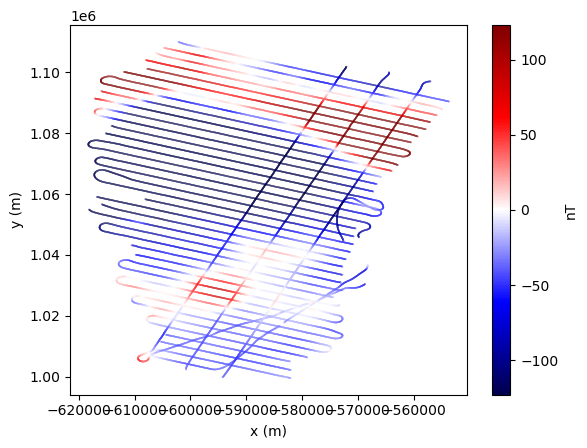

In [24]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 90)
plt.scatter(fiss2_bailey.x, fiss2_bailey.y, c=fiss2_bailey.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.show()

In [4]:
fiss2_recovery = pd.read_csv(
    '../data/FISS2_Recovery_area_ADMAP2.XYZ',
    na_values="*",
)
fiss2_recovery

,Line:Flight,Lon,Lat,Height_WGS84,Date,Time,RMag,TCorr,RefField,MagRTC,BCorr,MagBRT,ACorr,MagF,MagL,MagML,x,y
0,L0:006,-37.538525,-81.199983,672.7690,2016/12/29,14:01:57.39,47886.2904,0.0,47939.5,-53.23,-12.5,-40.73,0.0,-40.73,-41.56,-42.61,-583674.73,759601.64
1,L0:006,-37.535515,-81.199839,672.7470,2016/12/29,14:01:58.39,47886.9742,0.0,47939.3,-52.29,-12.5,-39.79,0.0,-39.79,-40.63,-41.68,-583644.41,759644.78
2,L0:006,-37.532509,-81.199696,672.8040,2016/12/29,14:01:59.39,47888.0682,0.0,47939.0,-50.94,-12.5,-38.44,0.0,-38.44,-39.28,-40.33,-583614.07,759687.79
3,L0:006,-37.529508,-81.199551,672.6880,2016/12/29,14:02:00.39,47888.6234,0.0,47938.8,-50.13,-12.5,-37.64,0.0,-37.64,-38.48,-39.53,-583583.93,759730.92
4,L0:006,-37.526513,-81.199406,672.5720,2016/12/29,14:02:01.39,47888.8454,0.0,47938.5,-49.66,-12.5,-37.17,0.0,-37.17,-38.00,-39.05,-583553.87,759773.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79954,T660:011,-31.552200,-81.123367,1306.8330,2017/01/01,16:28:54.78,47869.0962,0.0,47620.0,249.06,4.9,244.15,0.0,244.15,242.88,NaN,-505653.14,823465.98
79955,T660:011,-31.553933,-81.122938,1307.2480,2017/01/01,16:28:55.78,47867.8672,0.0,47619.7,248.14,4.9,243.23,0.0,243.23,241.96,NaN,-505702.58,823490.64
79956,T660:011,-31.555825,-81.122524,1307.6490,2017/01/01,16:28:56.78,47867.4782,0.0,47619.4,248.04,4.9,243.14,0.0,243.14,241.87,NaN,-505753.45,823512.49
79957,T660:011,-31.557911,-81.122128,1308.9771,2017/01/01,16:28:57.78,47867.9440,0.0,47619.1,248.80,4.9,243.90,0.0,243.90,242.63,NaN,-505806.08,823530.95


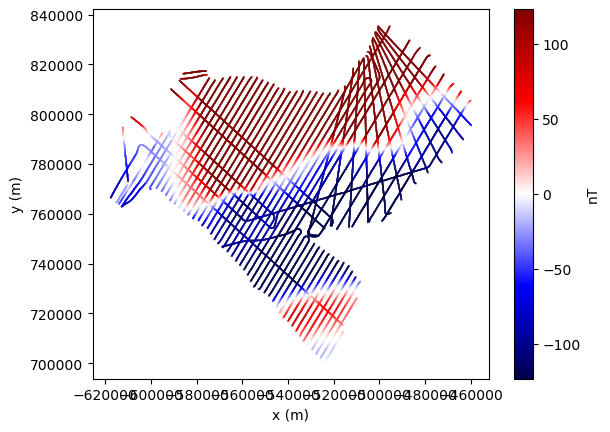

In [25]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 90)
plt.scatter(fiss2_recovery.x, fiss2_recovery.y, c=fiss2_recovery.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.show()

In [5]:
fiss2_slessor = pd.read_csv(
    '../data/FISS2_Slessor_area_ADMAP2.XYZ',
    na_values="*",
)
fiss2_slessor

,Line:Flight,Lat,Lon,Height_WGS84,Date,Time,RMag,TCorr,RefField,MagRTC,BCorr,MagBRT,ACorr,MagF,MagL,MagML,x,y
0,L0:012,-79.539338,-32.585491,412.087,2017/01/02,15:57:39.01,46410.6644,0.0,46341.0,69.70,0.0,69.70,5.0,64.70,50.91,51.61,-613748.94,960228.11
1,L0:012,-79.539541,-32.583318,412.762,2017/01/02,15:57:40.01,46410.8332,0.0,46341.0,69.81,0.0,69.81,5.0,64.81,51.02,51.75,-613700.55,960232.65
2,L0:012,-79.539769,-32.581220,413.314,2017/01/02,15:57:41.01,46410.5700,0.0,46341.1,69.45,0.0,69.45,5.0,64.45,50.67,51.43,-613651.94,960234.08
3,L0:012,-79.540019,-32.579203,413.640,2017/01/02,15:57:42.01,46410.1092,0.0,46341.2,68.87,0.0,68.87,5.0,63.87,50.09,50.89,-613603.39,960232.61
4,L0:012,-79.540292,-32.577274,413.772,2017/01/02,15:57:43.01,46409.2816,0.0,46341.4,67.90,0.0,67.90,5.0,62.90,49.12,49.95,-613554.96,960228.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49629,T270:015,-80.091830,-26.862085,636.444,2017/01/04,14:23:11.46,46881.5606,106.0,46598.5,283.04,-9.4,292.44,0.0,292.44,175.72,NaN,-487598.60,962687.70
49630,T270:015,-80.092308,-26.861873,634.660,2017/01/04,14:23:12.46,46882.4232,106.0,46599.0,283.45,-9.4,292.86,0.0,292.86,176.14,NaN,-487571.40,962642.84
49631,T270:015,-80.092786,-26.861656,633.078,2017/01/04,14:23:13.46,46884.0832,106.0,46599.4,284.67,-9.4,294.09,0.0,294.09,177.36,NaN,-487544.12,962598.02
49632,T270:015,-80.093265,-26.861440,631.697,2017/01/04,14:23:14.46,46885.3268,106.0,46599.8,285.48,-9.4,294.89,0.0,294.89,178.17,NaN,-487516.80,962553.09


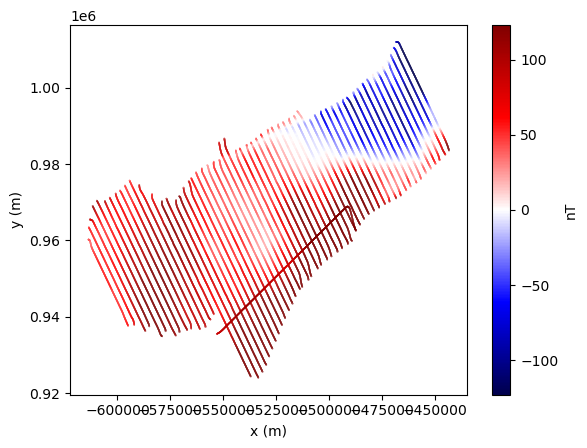

In [26]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 90)
plt.scatter(fiss2_slessor.x, fiss2_slessor.y, c=fiss2_slessor.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.show()